TP 1 : Régression linéaire / polynomiale
======

# 0 - Introduction

L'objectif de ce premier TP est de se familiariser avec des outils d'apprentissage statistique. Nous les appliquerons à la régression linéaire et logistique.

Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [7]:
#Ce bloc contient tous les imports nécessaires pour ce TP.

# import outils mathématique
import numpy as np
from numpy.linalg import inv

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D # pour la gestion de figure 3D
import matplotlib.patches as mpatches

# import librairies d'apprentissage automatique
import sklearn as skl
import sklearn.datasets as data
import sklearn.linear_model

# Divers 
from IPython.display import display, Markdown

# 1 - Outils de base  <a id="title1"></a>
## 1.1 - Introduction aux  notebook Jupyter <a id="title1.1"></a>

Le code est à écrire en `python 3` à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée* (ou *Shift-Entrée*), à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du "run" permettant de retrouver, par la suite, l'ordre de lancement de chaque bloc.

Commencez par importer les librairies nécessaires au TP, en exécutant le premier bloc du TP. Lancez ensuite le bloc ci-dessous. Vous devez obtenir les numéros de version des librairies installé sur votre machine.

In [8]:
print('Version de numpy:',np.__version__)
print('Version de matplotlib:',matplotlib.__version__)

Version de numpy: 2.2.2
Version de matplotlib: 3.10.0


Exécutez la ligne suivante en vous plaçant dans la cellule et en appuyant sur *Ctrl+Entrée*.

In [9]:
a = 1 
print(a)

1


Lancez la ligne suivante plusieurs fois. L'ordre d'exécution des blocs est important dans un notebook jupyter. Constatez les changements d'affichage produit.

In [10]:
a += 1 
print(a)

2


Relancez le premier bloc définissant la variable `a=1` puis lancez le bloc suivant (remarquez bien les valeurs après `In [` ):

In [11]:
print(a)

2


Vous pouvez utiliser l'aide à la complétion avec la touche `tab`. Testez avec la fonction `np.random.randn`.

Vous pouvez accéder à une documentation simplifiée de la fonction avec `Shit+tab`. Pour plus d'information, cliquez sur le +. Il est possible d'accéder directement à la documentation détaillée en ajoutant `?` à la fin de la commande.
Testez avec la fonction `np.random.randn`.

In [12]:
np.random.randn

<bound method RandomState.randn of RandomState(MT19937) at 0x74FCF4F15B40>

In [13]:
#np.random.randn?

Pour aller plus loin: https://jupyter-notebook.readthedocs.io/en/stable/

## 1.2 - Introduction à la visualisation des données (Matplotlib)<a id="title1.2"></a>

Nous allons utiliser dans ce TP la librairie de visualisation `Matplotlib`. L'usage de cette librairie est simplifié dans les notebook jupyter. Je donnerai dans ce TP l'usage standard de la librairie, certaines instructions données pourront être facultatives dans un notebook mais serait indispensable dans un interpréteur python classique.

`Matplotlib` permet de construire une figure à visualiser. La création d'une figure ce fait à l'aide de l'instruction `plt.figure`. Toutes les instructions que l'on fait ensuite agissent sur la figure courante en mémoire mais ne sont pas directement visible. Afin de rendre effectivement visible la figure finale, on utilise l'instruction `plt.show`. Cette instruction est bloquante en python standard. 
Testez le code suivant affichant un `sinus` et un `cosinus`.

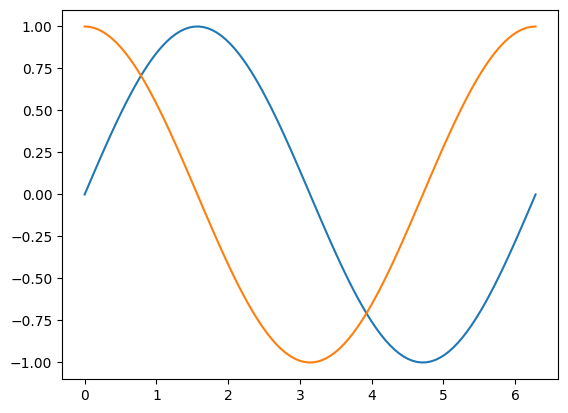

In [14]:
x = np.linspace(0,2*np.pi,100) # création de 100 points entre 0 et 2pi
plt.figure() # Création d'une figure
plt.plot(x,np.sin(x)) # Ajout du tracé d'un sinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.plot(x,np.cos(x)) # Ajout du tracé d'un cosinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.show() # Affichage de la figure créée.

Regardez le code suivant. Il permet de tracer la fonction sinus en rouge en mettant des carrés (square == s) aux points vraiment calculés et en les reliant par une droite. Le deuxième tracé est la fonction sinus en bleu, seuls les points calculés sont tracés à l'aide d'étoile.

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_26948/2725556486.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Comparaison Sinus/Cosinus entre 0 et $2\pi$')


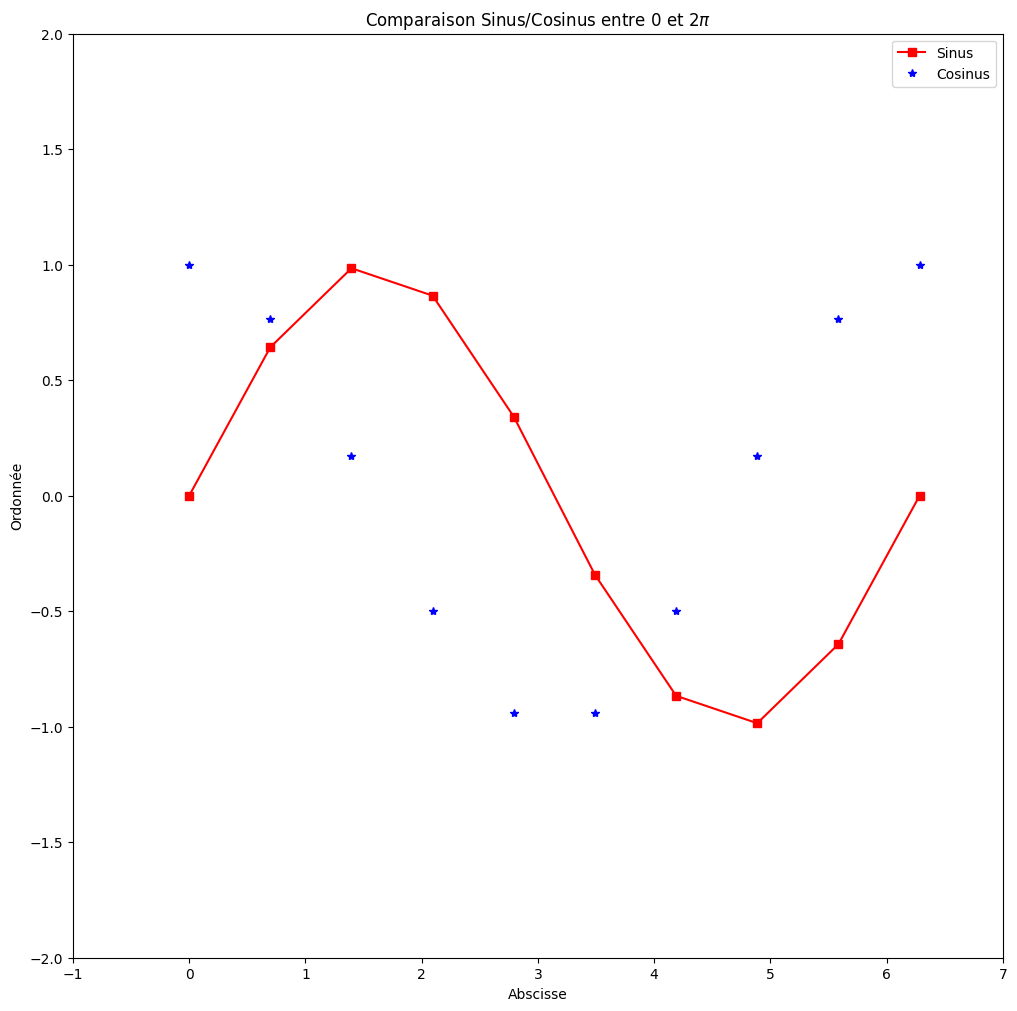

In [15]:
x = np.linspace(0,2*np.pi,10)

plt.figure(figsize=(12,12)) # définition d'une figure en précisant sa taille

# Courbes
plt.plot(x,np.sin(x),'rs-',label='Sinus')
plt.plot(x,np.cos(x),'b*',label='Cosinus')

# Titre et légende
plt.title('Comparaison Sinus/Cosinus entre 0 et $2\pi$')
plt.legend()

# Texte des axes
plt.xlabel('Abscisse')
plt.ylabel('Ordonnée')

# Définition des limites des axes
plt.xlim([-1,7])
plt.ylim([-2,2])

plt.show() # Affichage de la figure créée.

Attention l'ordre des points est important si on souhaite les relier:

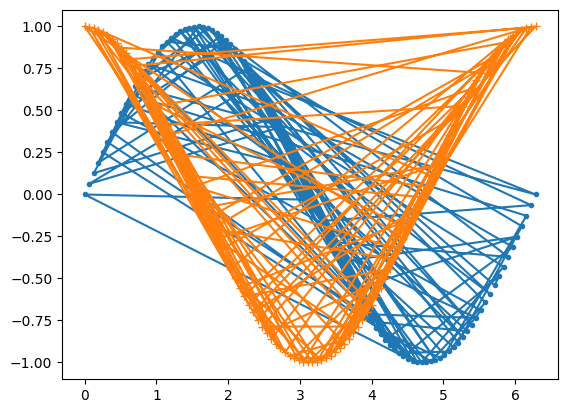

In [ ]:
x = np.linspace(0,2*np.pi,100)
np.random.shuffle(x)
plt.figure()
plt.plot(x,np.sin(x),'.-')
plt.plot(x,np.cos(x),'+')
plt.show()

Faites une figure affichant à la fois la fonction sinus cardinal de $\dfrac{x}{\pi}$ (vous pouvez utiliser `np.sinc`) et l'inverse de x. Vous mettrez la fonction inverse en pointillé. Vous ajouterez également un titre et une légende.

La fonction `plt.scatter` permet d'afficher spécifiquement des points qui ne seront pas reliés. Elle permet notamment d'afficher des points de couleurs et tailles différentes.

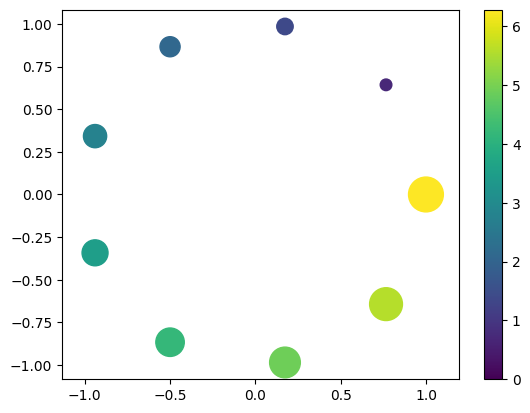

In [17]:
t = np.linspace(0,2*np.pi,10)
plt.figure()
plt.scatter(np.cos(t),np.sin(t),c=t,s=100*t)
plt.axis('equal') # pour avoir des axes avec les mêmes proportions.
plt.colorbar() # Échelle des valeurs associées aux couleurs 

#cbar = plt.colorbar(ticks=[0,np.pi,2*np.pi])
#cbar.ax.set_yticklabels(["Low","Medium","High"])

plt.show()

La fonction `plt.imshow` permet d'afficher un tableau comme une image. Les valeurs doivent être soit entières entre 0 et 255 soit flottantes entre 0. et 1. .

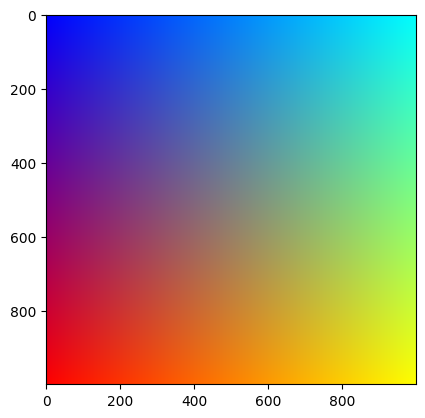

In [18]:
n=int(1e3)
x = np.linspace(0,1,n)
degradee = np.tile(x[:,np.newaxis],n)
im = np.stack((degradee,degradee.T,1-degradee),axis=2)

plt.figure()
plt.imshow(im)
plt.show()

Si le tableau est une matrice, l'image sera affichée en fausse couleurs correspondant à la carte de couleur paramétrée. Pour avoir une image en noir et blanc, il faudra préciser `cmap='gray'`.

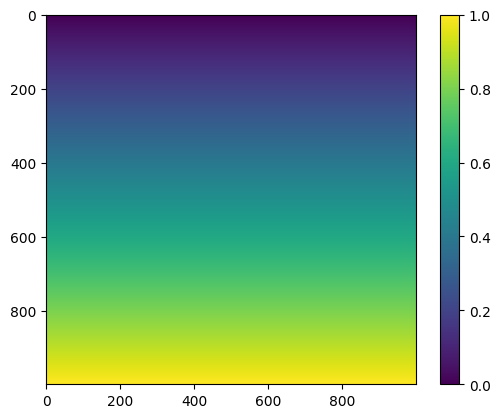

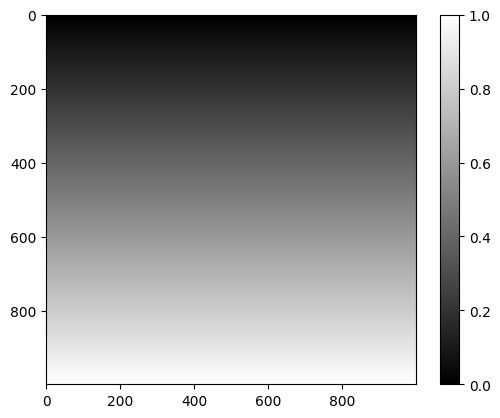

In [19]:
plt.figure()
plt.imshow(degradee)
plt.colorbar()

plt.figure()
plt.imshow(degradee,cmap='gray')
plt.colorbar()

plt.show()

Il est possible d'afficher des points en 3D. Pour cela il faut définir une figure avec une projection 3D. Il est ensuite possible d'utiliser les fonctions précédemment vues comme `plt.scatter`.

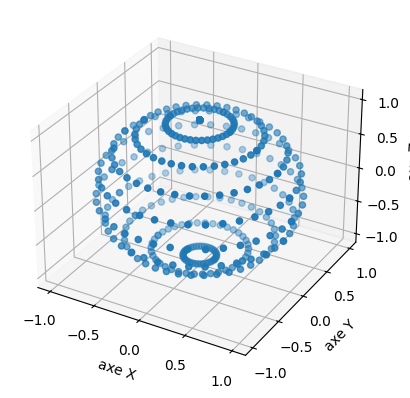

In [20]:
t = np.linspace(0,2*np.pi,20)
t = np.stack(np.meshgrid(t,t),axis=2).reshape((-1,2))

ax = plt.figure().add_subplot(projection='3d') # définition d'une figure 3D

ax.scatter(np.cos(t[:,1])*np.sin(t[:,0]), # abscisse
           np.sin(t[:,1])*np.sin(t[:,0]), # ordonnée
           np.cos(t[:,0]) # profondeur
          )
ax.set_xlabel('axe X')
ax.set_ylabel('axe Y')
ax.set_zlabel('axe Z')
plt.show()

Il est possible de faire des figures avec des sous-figures en utilisant `plt.subplots`.

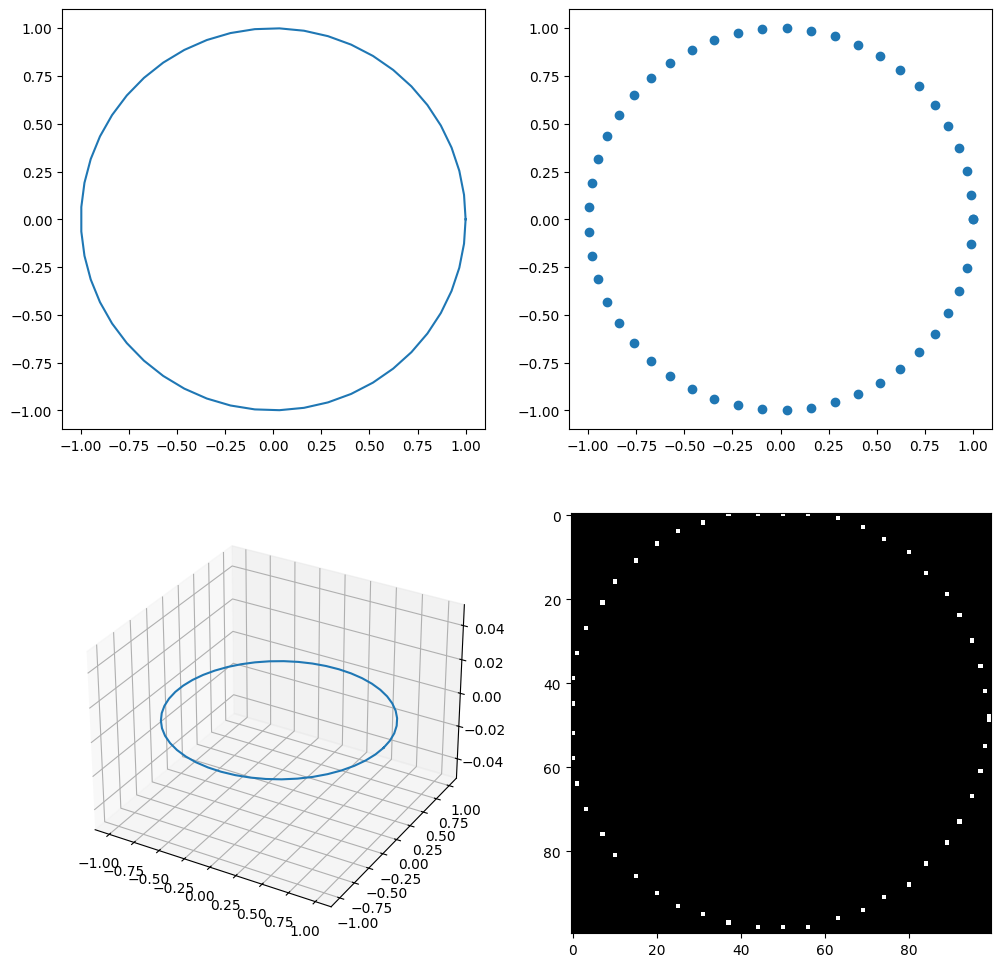

In [21]:
x = np.linspace(0,2*np.pi,int(5e1))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2, 2, 1)
ax.plot(np.cos(x),np.sin(x))
ax = fig.add_subplot(2, 2, 2)
ax.scatter(np.cos(x),np.sin(x))
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot(np.cos(x),np.sin(x))
ax = fig.add_subplot(2, 2, 4)
im = np.zeros((100,100))
im[(49+np.cos(x)*50).astype('int'),(49+np.sin(x)*50).astype('int')]=1
ax.imshow(im.T,cmap='gray')
plt.show()

## 1.3 Le calcul matriciel

Cette partie a pour but de reprendre rapidement les bases de numpy et notamment les éléments du tutoriel https://numpy.org/doc/stable/user/quickstart.html . N'hésitez pas à lire ce tutoriel pour avoir une maitrise des notions abordées.

### 1.3.1 Les créations de tableaux numpy

`Numpy` offre plusieurs outils de création de tableau que vous pouvez retrouver à l'adresse suivante: https://numpy.org/doc/stable/reference/routines.array-creation.html . Étudiez plus particulièrement les fonctions : 
- [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones),
- [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros), 
- [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array), 
- [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), 
- [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange).

En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant 5 fois la valeur un que vous nommerez `v1`.  

En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant les valeurs 9,10,11 que vous nommerez `v2`.  

En utilisant la fonction appropriée de `numpy`, créez une matrice contenant les valeurs 1,2,3 sur la première ligne et 4,5,6 sur la seconde. Vous la nommerez `M1`.  

Écrivez une matrice `M2` de taille $10\times10$ contenant que des zéros. Vous vérifierez les dimensions de la matrice avec l'attribut `shape`.

Il est possible de générer des tableaux pseudo-aléatoires avec `numpy`: https://numpy.org/doc/stable/reference/random/legacy.html

En vous appuyant sur la documentation générez une matrice `M3` de taille 10 par 5 de valeurs aléatoires entre 0 et 1 selon une loi uniforme. 

### 1.3.2 Les opérateurs mathématiques de base

Il est possible de faire des opérations termes à termes entre deux tableaux numpy par exemple avec `+ - / *`.

Testez les codes suivants:

In [22]:
print(2*v2)
print()
print(M1+M1)
print()
print(M3*M3)

NameError: name 'v2' is not defined

Le produit matriciel se fait avec l'opérateur `dot` ou le symbole `@`. En vous référant à la documentation ( https://numpy.org/doc/stable/reference/generated/numpy.dot.html ), calculez le produit matriciel entre la matrice `M3` et le vecteur `v1`. 

$M3 \times v1$ = 

array([2.6988717 , 2.49562197, 1.82038446, 2.08999498, 3.50266463,
       1.52377632, 3.5347667 , 2.62079835, 2.31208516, 1.33189027])

En vous référant à la documentation sur les opérateurs de manipulation de tableau ( https://numpy.org/doc/stable/reference/routines.array-manipulation.html ), que fait selon vous l'opération suivante:

`M1.T`


Quelle autre solution la documentation propose-t-elle pour réaliser cette opération ?

Vérification des valeurs de sorties des deux solutions: [[ True  True]
 [ True  True]
 [ True  True]]


L'opérateur `inv` ( https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html ) permet l'inversion d'une matrice.
Expliquez ce que fait l'opération suivante:

`inv( M1 @ M1.T)`

In [25]:
print(inv(M1@M1.T))

[[ 1.42592593 -0.59259259]
 [-0.59259259  0.25925926]]


### 1.3.3 Les opérateurs de concaténation

`Numpy` offre plusieurs opérateurs de concaténation: https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays . 
Veuillez lire plus particulièrement les documentations des fonctions suivantes:

- [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate)
- [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html#numpy.stack)
- [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html#numpy.append)


En utilisant la fonction la plus appropriée, concaténez les matrices `M2` et `M3` selon l'axe des colonnes.

Dim M2: (10, 10)
Dim M3: (10, 5)
Dim M2 et M3 concaténé selon les colonnes (10, 15)


Est-il possible de concaténer `M2` et `M3` selon l'axe des lignes ? Si oui comment, si non pourquoi ?   

En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première ligne le vecteur `v2` et sur la deuxième ligne un vecteur de 1.

[[ 9. 10. 11.]
 [ 1.  1.  1.]]


En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première colonne le vecteur `v2` et sur la deuxième colonne un vecteur de 1.

[[ 9.  1.]
 [10.  1.]
 [11.  1.]]


En utilisant la fonction la plus appropriée, créez un vecteur contenant d'abord 3 cases à 1 puis les valeurs du vecteur `v2`.

[ 1.  1.  1.  9. 10. 11.]


### 1.3.4 Le broadcasting

Lisez attendivement les informations de la page https://numpy.org/doc/stable/user/basics.broadcasting.html . Ce mécanisme est très puissant et peut simplifier/optimiser grandement votre code.

- Créez un vecteur `x` de 100 valeurs entre $-2\pi$ et $2\pi$.
- Créez un vecteur $v_\text{cos}$ de 100 valeurs de cosinus entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- Créez un vecteur $v_\text{sin}$ de 100 valeurs de sinus  entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- En utilisez le broadcasting de numpy, créé une matrice $M$ dont les valeurs $M_{i,j}$ sont $\text{cos}(x_i) + \text{sin}(x_j)$ où $x_i$ est la $i^\text{ème}$ valeur de $v_\text{cos}$ et $x_j$ est la $j^\text{ème}$ valeur de $v_\text{sin}$.
- A l'aide de la fonction `plt.imshow` de `matplotlib` . Affichez cette matrice comme une image.

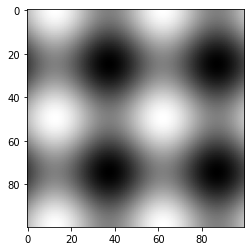

Bonus: En considérant une image noir et blanc comme une surface 3D dont l'altitude correspond à l'intensité lumineuse, affichez la figure précédente en 3D.

(10000, 2) (100, 100)


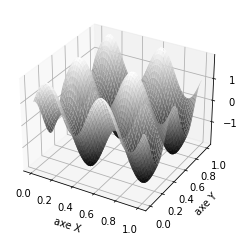

# 2 - Régression linéaire

## 2.1 - Génération d'un problème de régression

La bibliothèque `scikit-learn` permet de générer un problème de régression et de le résoudre.
Vous pouvez par exemple générer un problème de régression linéaire à l'aide de la fonction `make_regression` ( https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html ).

Générez un problème de régression linéaire composé de 50 points avec:
- une dimension de descripteur,
- une dimension informative,
- une dimension cible,
- un bruit d'écart type 5,
- un biais de 50.

Affichez les points obtenus. Pour simplifier la suite vous stockerez les abscisses dans un vecteur `x` et les ordonnées dans un vecteur `y`. Vérifiez vos dimensions pour n'avoir qu'une dimension dans les deux cas.

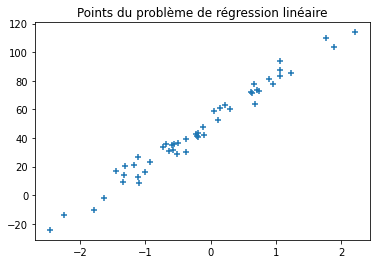

Dimensions de x: (50,)
Dimensions de y: (50,)


## 2.2 - Résolution analytique

En vous basant sur votre cours, qu'elle est la formule analytique permettant de résoudre ce problème de régression ? 

In [33]:
# Remplacez les ? par votre réponse
formule = '$$w_0 = ?$$\
           $$w_1 = ?$$'
display(Markdown(formule))

$$w_0 = ?$$           $$w_1 = ?$$

En utilisant la question précédente et les fonctions statistique de `numpy` ( https://numpy.org/doc/stable/reference/routines.statistics.htmlhttps://numpy.org/doc/stable/reference/routines.statistics.html ), donnez l'équation de la meilleure droite résolvant ce problème de régression.

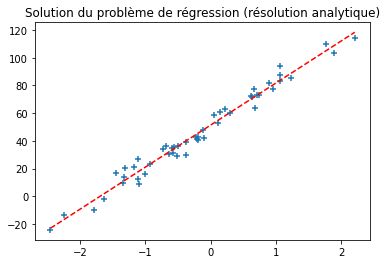

y =  30.428328262087675 x +  51.413483271945495


## 2.3 - Résolution avec scikit-learn

La bibliothèque `scikit-learn` permet de résoudre directement un problème de régression linéaire en utilisant la classe `LinearRegression` ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ). À l'aide de la documentation, résolvez le problème de régression précédent. Attention aux dimensions des entrées de la fonction `fit`.

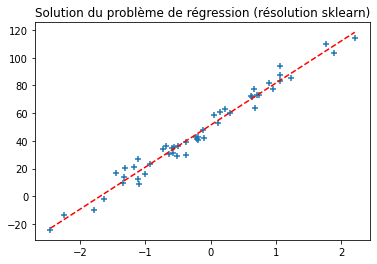

y =  30.428328262087682 x +  51.413483271945495


Les résultats entre les deux méthodes de résolution sont-ils comparables ? 

## 2.4 - Prédire de nouvelles valeurs

Prédisez les valeurs régressées pour 100 points dans un intervalle compris entre min(x) et max(x).  Utilisez la formule d'une droite avec les paramètres trouvés aux questions précédentes puis utilisez la fonction `predict` du régresseur `scikit-learn`.

Les résultats obtenus vous semble-t-il satisfaisant  ? 

Est-il pertinent de chercher à effectuer une régression linéaire régularisée sur ce jeu de données (type
LASSO ou Ridge) ? Expliquez pourquoi.

## 2.5 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des paramètres (w,b) appris.

In [36]:
def eval_regresseur(x,w,b):
    # A compléter

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [37]:
def get_loss(x,y,w,b):
    # A compléter

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne deux valeurs correspondant à la dérivée de la fonction de coût par rapport à $b$ et la dérivée de la fonction de coût par rapport à $w$.

In [38]:
def get_grad_loss(x,y,w,b):
    # A compléter

Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $w$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [39]:
def train_regresseur(x,y,t,N_max):
    '''
    :param X: exemples d'apprentissage
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :parame N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise (w,b), ainsi que l'évolution de la fonction de coût
    '''
    # Initialisation aléatoire de w et b
    # A compléter
    
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        grad_b,grad_w = ?
        w = ?
        b = ?
        loss += ?,
    return w,b,np.array(loss)

Visualisez l'évolution de la fonction de coût durant l'apprentissage. Est-elle bien décroissante ? 

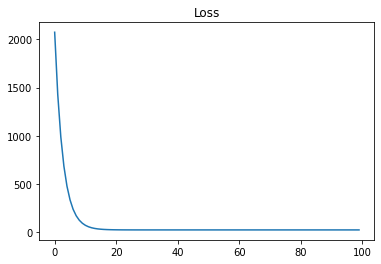

Visualisez la droite apprise par votre régresseur. Est-elle correcte ?

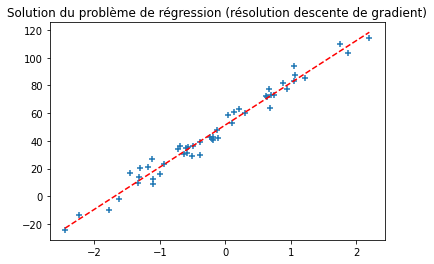

y =  30.428328009652155 x +  51.41348293667177


# 3 - Régression polynomiale

Exécutez le code suivant pour générer un nouveau problème de régression

In [42]:
d = data.make_regression(
    n_samples = 30,
    n_features = 1,
    n_informative = 1,
    n_targets = 2,
    noise = 10
)

x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

Affichez les données générées.

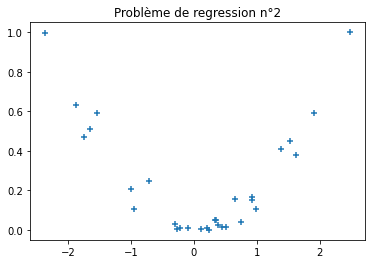

A votre avis quel devrait être le degré d'un polynôme résolvant ce problème de régression ?

## 3.1 Résolution analytique

En utilisant l'astuce vue en cours pour effectuer une régression polynomiale, faites la résolution analytique de ce problème de régression.

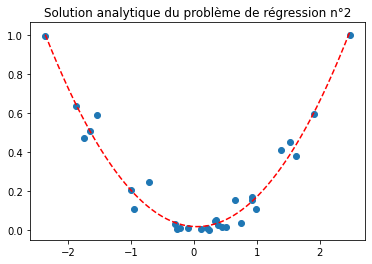

## 3.2 Résolution avec scikit-learn

En utilisant la même astuce, résolvez ce problème de régression polynomial avec le régresseur linéaire de scikit-learn.

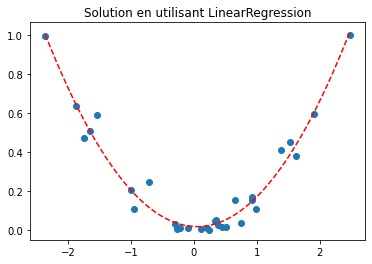

Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation. Tracez les courbes correspondantes et étudiez les valeurs des coefficients des
polynômes trouvés. Faites une analyse des résultats.

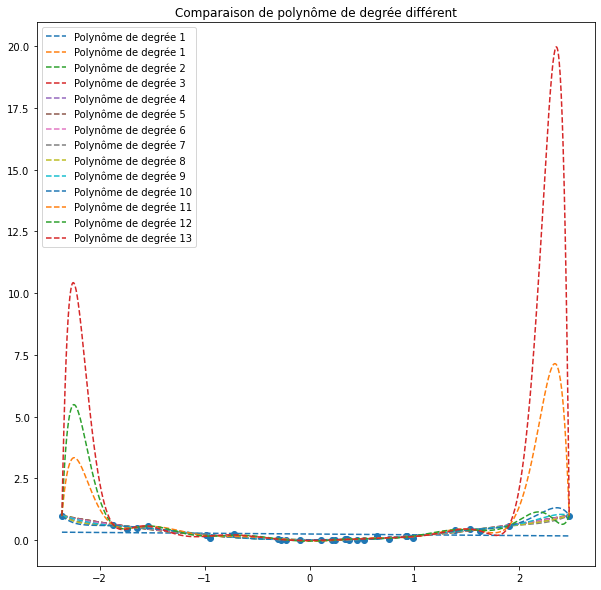

Testez également les modèles `linear_model.Ridge` et `linear_model.Lasso` à la place de linear model.LinearRegression
. Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation.

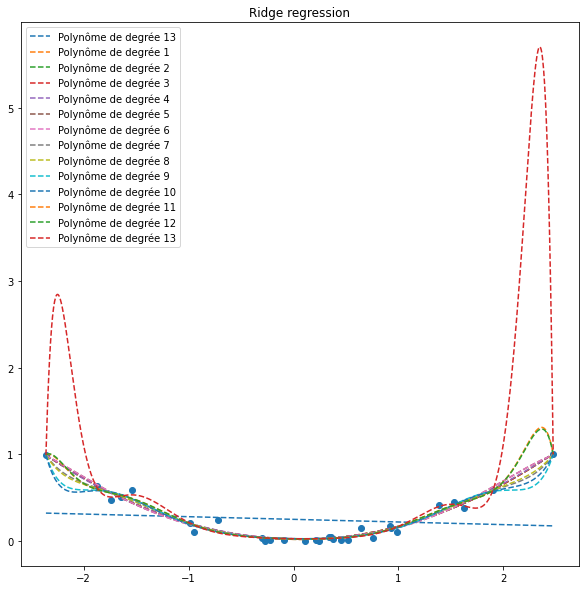

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.274e-04, tolerance: 2.450e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.667e-04, tolerance: 2.450e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

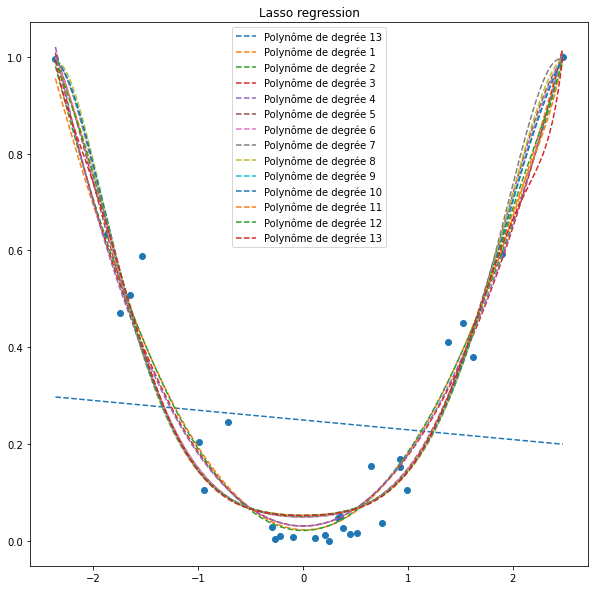

La documentation de scikit-learn propose une autre fonction pour la régression LASSO : linear model.LassoLars ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html ).
Quelle est la différence avec la précédente ? Testez cette fonction pour ce problème de régression.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If y

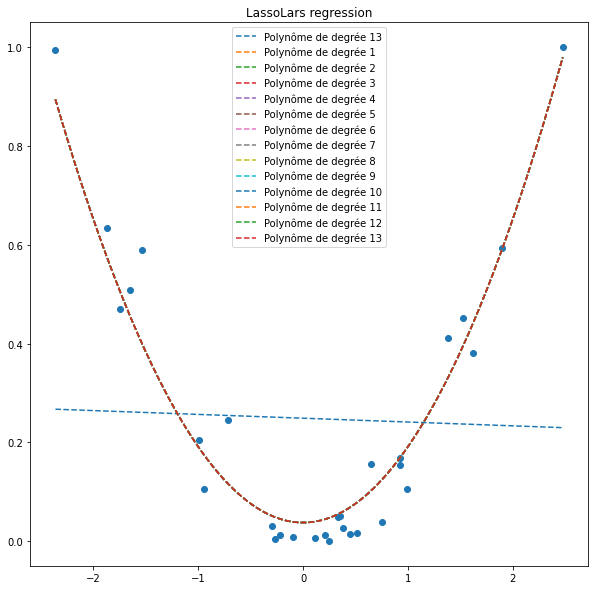

## 3.3 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des poids appris (W). On utilisera l'astuce vue en cour pour intégrer le biais à $W$.

In [51]:
def eval_regresseur(X,W):
    # A compléter

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [52]:
def get_loss(X,y,W):
    # A compléter

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne une valeur correspondant au gradient de la fonction de coût par rapport W.

In [53]:
def get_grad_loss(X,y,W):
    # A compléter

Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $W$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [54]:
def train_regresseur(X,y,t,N_max):
    '''
    :param X: exemples d'apprentissage (la première colonne doit contenir que des 1).
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :parame N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise
    '''
    #y = y[:,None]
    # Initialisation aléatoire de w et b
    # A compléter
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        grad = ?
        W = ?
        loss += ?,
    return W,np.array(loss)

Visualisez la solution trouvée. 

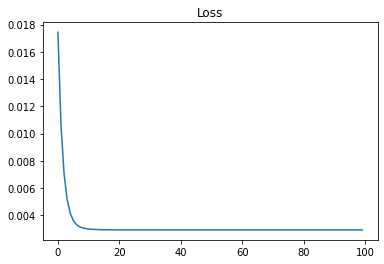

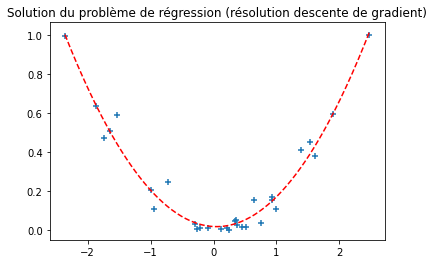

y =  0.16953259514962332 x^2 +  -0.016955881583807765 x +  0.017735340985395726
